**1. Introduction (5pts)**


Explain the problem, and how you intend to solve it. Explain what KNN is and how it works in your own wors.

Explain which authors you chose, and how you collected their works (e.g. Project Gutenberg, etc.)

In this project, we're diving into the writings of two great authors, Charles Dickens and William Shakespeare. Our goal is to find interesting patterns in their works using a clever tool called the K-Nearest Neighbors (KNN) algorithm.

Here's the challenge: we want to accurately sort out one extra piece of writing from each author by using patterns we discover in five of their early works.

Now, the KNN algorithm is like a helpful assistant in computer science. It's really good at putting things into groups. Picture this: when we look at a new piece of writing, KNN checks out its closest writing buddies. If most of those buddies belong to a certain group, KNN suggests that the new piece of writing probably belongs to that group too. It's like saying, "Hey, you're hanging out with these friends a lot, so you must be like them!"

What's neat about KNN is that it doesn't need a special training session. It remembers everything it read before and uses that knowledge to make predictions about new writings. The number of buddies it considers (we call this "k") is important because it affects how well KNN does its job.

So, we picked Charles Dickens and William Shakespeare because they have different writing styles. We're being careful with choosing their works to make sure the patterns we find are real and unique. We're getting these writings from Project Gutenberg, a digital library with lots of classic works.

Our collection has five early works from each author for training KNN, and one more from each as a test. This way, we're showing how machine learning, like KNN, can help us understand literature better. It's like shining a light on the mix of computers and studying books, bringing new insights into how we analyze stories.

In [14]:
from bs4 import BeautifulSoup
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import requests
nltk.download('stopwords')
nltk.download('punkt')

class TextProcessor:
  def __init__(self, url, output_file):
    self.url = url
    self.output_file = output_file

  def extract_text_from_html_file(self, content):
      soup = BeautifulSoup(content, 'html.parser')
      # Extract text from all paragraphs (you can adjust based on your HTML structure)
      paragraphs = soup.find_all(['p', 'div'])
      text = ' '.join([p.get_text(separator=' ') for p in paragraphs])
      return text

  def clean_text(self, text):
      # Remove HTML tags and attributes
      text = re.sub(r'<[^>]+>', '', text)

      # Remove non-alphanumeric characters
      text = re.sub(r'\W', ' ', text)

      # Convert to lowercase
      text = text.lower()

      # Remove stopwords
      stop_words = set(stopwords.words('english'))
      word_tokens = word_tokenize(text)
      text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])

      # Remove punctuation
      text = text.translate(str.maketrans("", "", string.punctuation))

      # Stemming
      ps = PorterStemmer()
      text = ' '.join([ps.stem(word) for word in word_tokens])

      return text

  def save_cleaned_text_to_csv(self, cleaned_text, output_csv_path):
      # Split the cleaned text into a list of words
      words = cleaned_text.split()

      # Create a DataFrame with word counts
      word_counts = pd.Series(words).value_counts().reset_index()
      word_counts.columns = ['Word', 'Frequency']

      # Save the DataFrame to a CSV file
      word_counts.to_csv(output_csv_path, index=False)

  def main(self):

      # Extract text from HTML file
      content = requests.get(self.url).text
      html_text = self.extract_text_from_html_file(content)

      # Clean the text
      cleaned_text = self.clean_text(html_text)

      # Save cleaned text to a CSV file
      self.save_cleaned_text_to_csv(cleaned_text, self.output_file)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
!pip install nltk

**3. Pandas Data Exploration (5pts)**

Load in a data set (.csv) using pandas, and explore it using a couple of data frame methods (e.g. .head(), .info(), or .describe(), etc.).)

**Pandas Data Exploration**

**Definition of Dimension of Analysis:**

In the context of this analysis, a dimension refers to a specific feature or attribute that is used to characterize and distinguish literary works from different authors. These dimensions are quantitative aspects extracted from the textual data, such as word frequency, word count, or any other relevant metric.

**Selected Dimensions:**
1. **Word Frequency:** This dimension represents the frequency of specific words in each literary work. It is selected because word choice and frequency can be indicative of an author's writing style.

2. **Word Count:** The total number of words in a literary work is chosen as a dimension. It provides insight into the length and complexity of the writing, which may vary between authors.

3. **Another Relevant Dimension:** This could be any other quantitative feature deemed relevant to distinguish between authors. For example, sentence length, paragraph structure, or the use of certain literary devices.

Reasoning:
- Diversity in Style: Word frequency captures nuances in an author's language, providing a measure of the uniqueness of their writing style.

- Length and Complexity: Word count gives a sense of the overall length and complexity of the literary work, which can vary significantly between authors.

- Additional Dimension: Including another relevant dimension adds depth to the analysis, allowing for a more comprehensive understanding of the differences between authors.

Looking for Clustering:
- Yes: The selected dimensions are likely to exhibit clustering tendencies. Authors often have distinct patterns in word usage and writing style that can lead to natural clusters.

Normalization
- Normalization is Recommended: Normalizing the dimensions is crucial, especially if they are measured on different scales. Normalization ensures that each dimension contributes proportionally to the analysis, preventing one dimension from dominating due to its larger scale.

Explanation:
- Equal Weightage: Normalizing dimensions ensures that each feature contributes equally to the distance calculations in the KNN algorithm, preventing biases based on the scale of the features.

- Consistent Comparison: Normalization facilitates a fair and consistent comparison between different dimensions, allowing the KNN algorithm to consider each dimension's influence appropriately.

Dimensions offer a well-rounded view of an author's writing style. Normalizing these dimensions enhances the effectiveness of the KNN algorithm by treating each aspect equally and allowing for a more accurate comparison between different works.

**Author A Dimension Analysis**

In [16]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'a1.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())


Head of the DataFrame:
  Word  Frequency
0  the      11856
1  and       8967
2   to       5761
3   of       5508
4    a       4855

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7711 entries, 0 to 7710
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       7710 non-null   object
 1   Frequency  7711 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.6+ KB
None

Summary Statistics:
          Frequency
count   7711.000000
mean      29.169887
std      240.299915
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max    11856.000000


In [17]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'a2.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the      14786
1  and      10843
2   to       8967
3   of       8421
4    a       7300

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9255 entries, 0 to 9254
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       9255 non-null   object
 1   Frequency  9255 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 144.7+ KB
None

Summary Statistics:
          Frequency
count   9255.000000
mean      36.304376
std      314.458093
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max    14786.000000


In [18]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'a3.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the       1275
1  and       1015
2   of        662
3   to        610
4    a        554

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       3108 non-null   object
 1   Frequency  3108 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.7+ KB
None

Summary Statistics:
         Frequency
count  3108.000000
mean      7.803411
std      40.867031
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max    1275.000000


In [19]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'a4.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the       2377
1   to       1940
2  and       1754
3    i       1622
4  you       1443

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3721 entries, 0 to 3720
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       3721 non-null   object
 1   Frequency  3721 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.3+ KB
None

Summary Statistics:
         Frequency
count  3721.000000
mean     22.059393
std      98.641345
min       1.000000
25%       2.000000
50%       4.000000
75%      10.000000
max    2377.000000


In [20]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'a5.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the       1786
1  and       1146
2   of        781
3    a        771
4   to        768

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       3725 non-null   object
 1   Frequency  3725 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.3+ KB
None

Summary Statistics:
         Frequency
count  3725.000000
mean      8.828725
std      50.345351
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max    1786.000000


In [21]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'ua.csv'

# Load the CSV file into a pandas DataFrame
df_ua = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df_ua.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df_ua.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df_ua.describe())

Head of the DataFrame:
  Word  Frequency
0  the       6859
1  and       4575
2   of       4042
3    a       2710
4   to       2519

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       6912 non-null   object
 1   Frequency  6912 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 108.1+ KB
None

Summary Statistics:
         Frequency
count  6912.000000
mean     16.003617
std     134.918564
min       1.000000
25%       1.000000
50%       3.000000
75%       7.000000
max    6859.000000


In [22]:
# Analyze dimensions
# Word Frequency
word_frequency_max = df_ua['Frequency'].max()
word_frequency_min = df_ua['Frequency'].min()
word_frequency_mean = df_ua['Frequency'].mean()

# Word Length
word_length = df_ua['Word'].astype(str).apply(len)
#word_length = combined_df['Word'].apply(len)

# Unique Word Count
unique_word_count = len(df_ua)

# Print analysis results
print(f"Word Frequency (Max): {word_frequency_max}")
print(f"Word Frequency (Min): {word_frequency_min}")
print(f"Word Frequency (Mean): {word_frequency_mean:.2f}")

print(f"\nWord Lengths:\n{word_length}")

print(f"\nUnique Word Count: {unique_word_count}")

Word Frequency (Max): 6859
Word Frequency (Min): 1
Word Frequency (Mean): 16.00

Word Lengths:
0       3
1       3
2       2
3       1
4       2
       ..
6907    9
6908    9
6909    8
6910    6
6911    8
Name: Word, Length: 6912, dtype: int64

Unique Word Count: 6912


In [23]:
# Create a new DataFrame with the analysis results
df_ua = pd.DataFrame({
    'Statistic': ['Max', 'Min', 'Mean', 'Unique Word Count'],
    'Value': [word_frequency_max, word_frequency_min, word_frequency_mean, unique_word_count]
})

# Print and display the analysis results
print(df_ua)

# Save the analysis results to a CSV file (adjust the file path as needed)
df_ua.to_csv('analysis_results_ua.csv', index=False)

           Statistic        Value
0                Max  6859.000000
1                Min     1.000000
2               Mean    16.003617
3  Unique Word Count  6912.000000


**Author B  Dimesion Analysis**

In [24]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'b1.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the       1656
1  and       1480
2    i       1449
3   to       1145
4    f       1052

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       3044 non-null   object
 1   Frequency  3044 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.7+ KB
None

Summary Statistics:
         Frequency
count  3044.000000
mean     19.343298
std      80.559949
min       1.000000
25%       3.000000
50%       4.000000
75%       9.250000
max    1656.000000


In [25]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'b2.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the       5267
1  and       4016
2   to       3636
3   of       3016
4   he       2081

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       5168 non-null   object
 1   Frequency  5168 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None

Summary Statistics:
         Frequency
count  5168.000000
mean     20.644543
std     142.556758
min       1.000000
25%       1.000000
50%       3.000000
75%       9.000000
max    5267.000000


In [26]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'b3.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the      15187
1  and      12851
2   to      10359
3    i       9545
4   of       8658

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       9171 non-null   object
 1   Frequency  9171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 143.4+ KB
None

Summary Statistics:
          Frequency
count   9171.000000
mean      39.958456
std      348.615015
min        1.000000
25%        1.000000
50%        3.000000
75%       11.000000
max    15187.000000


In [27]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'b4.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the       1839
1    i       1408
2  and       1293
3   of       1035
4   to       1011

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       2888 non-null   object
 1   Frequency  2888 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.2+ KB
None

Summary Statistics:
         Frequency
count  2888.000000
mean     16.802632
std      75.753052
min       1.000000
25%       2.000000
50%       3.000000
75%       8.000000
max    1839.000000


In [28]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'b5.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())

Head of the DataFrame:
  Word  Frequency
0  the      12741
1   of       7807
2  and       6867
3   to       6091
4   in       5297

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       7046 non-null   object
 1   Frequency  7046 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 110.2+ KB
None

Summary Statistics:
          Frequency
count   7046.000000
mean      31.487936
std      258.292679
min        1.000000
25%        2.000000
50%        4.000000
75%       12.000000
max    12741.000000


In [29]:
import pandas as pd

# Replace 'path/to/your/cleaned_text.csv' with the actual path to your CSV file
csv_file_path = 'ub.csv'

# Load the CSV file into a pandas DataFrame
df_ub = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df_ub.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(df_ub.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df_ub.describe())

Head of the DataFrame:
  Word  Frequency
0  the       2380
1  and       2028
2   to       1525
3   of       1197
4    a        999

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       4079 non-null   object
 1   Frequency  4079 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.9+ KB
None

Summary Statistics:
         Frequency
count  4079.000000
mean     12.563128
std      73.603090
min       1.000000
25%       1.000000
50%       2.000000
75%       6.000000
max    2380.000000


In [30]:
# Analyze dimensions
# Word Frequency
word_frequency_max = df_ub['Frequency'].max()
word_frequency_min = df_ub['Frequency'].min()
word_frequency_mean = df_ub['Frequency'].mean()

# Word Length
word_length = df_ub['Word'].astype(str).apply(len)
#word_length = combined_df['Word'].apply(len)

# Unique Word Count
unique_word_count = len(df_ub)

# Print analysis results
print(f"Word Frequency (Max): {word_frequency_max}")
print(f"Word Frequency (Min): {word_frequency_min}")
print(f"Word Frequency (Mean): {word_frequency_mean:.2f}")

print(f"\nWord Lengths:\n{word_length}")

print(f"\nUnique Word Count: {unique_word_count}")

Word Frequency (Max): 2380
Word Frequency (Min): 1
Word Frequency (Mean): 12.56

Word Lengths:
0        3
1        3
2        2
3        2
4        1
        ..
4074     7
4075     9
4076     5
4077    10
4078     8
Name: Word, Length: 4079, dtype: int64

Unique Word Count: 4079


In [31]:
# Create a new DataFrame with the analysis results
df_ub = pd.DataFrame({
    'Statistic': ['Max', 'Min', 'Mean', 'Unique Word Count'],
    'Value': [word_frequency_max, word_frequency_min, word_frequency_mean, unique_word_count]
})

# Print and display the analysis results
print(df_ub)

# Save the analysis results to a CSV file (adjust the file path as needed)
df_ub.to_csv('analysis_results_ub.csv', index=False)

           Statistic        Value
0                Max  2380.000000
1                Min     1.000000
2               Mean    12.563128
3  Unique Word Count  4079.000000


**(10pts) Pandas Data Frame**

**Construct one large pandas DataFrame containing all 12 literary works and all associated dimensions of analysis (all word/freq pairs for each author in one chart**

**Visualizations**

To create the visualizations  with libraries such as matplotlib for plotting 2D scatter plots and ipympl for the interactive 3D scatter plot. Below is code snippet.

2D Scatter Plots:
Create three 2D scatter plots, each comparing one dimension against another. Use separate colors for Author A, Author B, "Unknown A," and "Unknown B."

3D Scatter Plot:
Generate an interactive 3D scatter plot using ipympl, plotting all three dimensions.

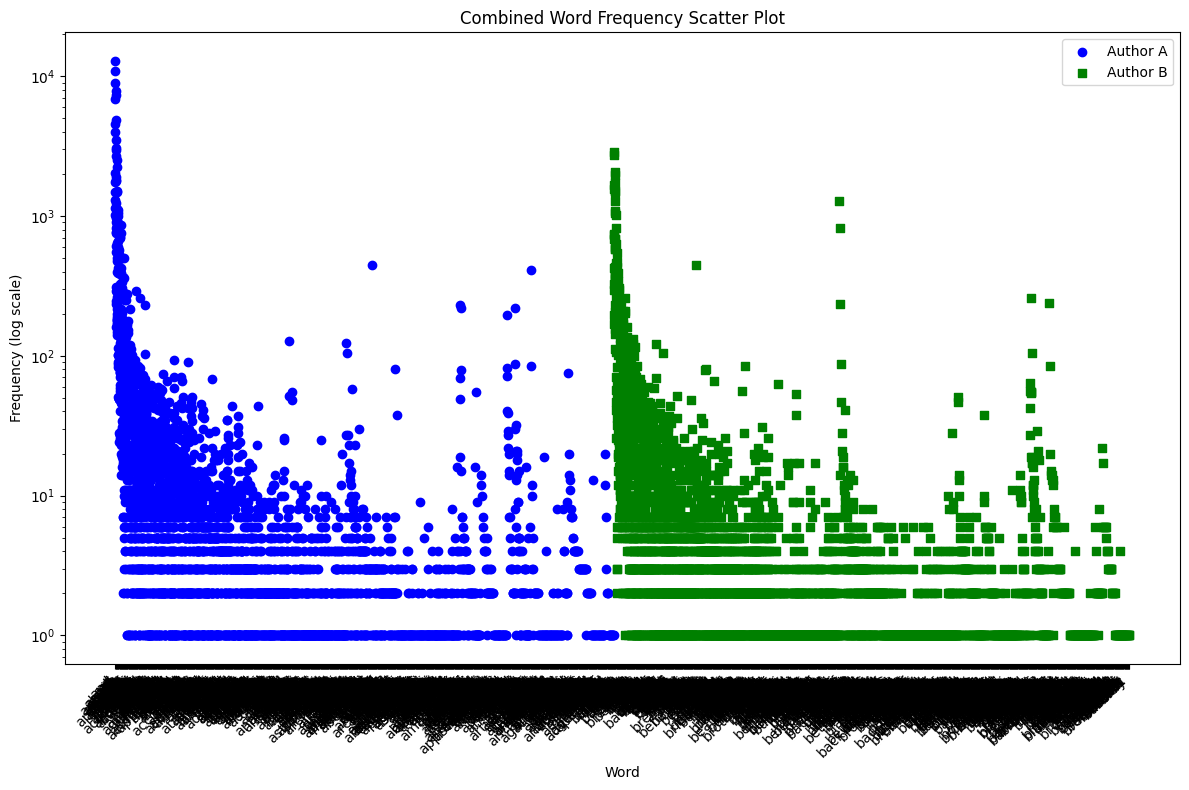

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load individual CSV files for each author
def load_author_data(author, unknown_author_path, num_files):
    file_list = [pd.read_csv(f'{author}{i}.csv') for i in range(1, num_files + 1)]
    unknown_file = pd.read_csv(unknown_author_path)
    return file_list + [unknown_file]

# Load data for Author A
author_a_data = load_author_data('a', 'ua.csv', 5)

# Load data for Author B
author_b_data = load_author_data('b', 'ub.csv', 5)

# Combine all individual files into one DataFrame
combined_df = pd.concat(author_a_data + author_b_data)

# Convert 'Word' column to string to handle mixed types
combined_df['Word'] = combined_df['Word'].astype(str)

# Scatter plot for the combined dataset with log scale on y-axis
plt.figure(figsize=(12, 8))

# Dictionary to map colors and markers to authors
author_styles = {'a': ('blue', 'o'), 'b': ('green', 's')}

for author, (color, marker) in author_styles.items():
    author_df = combined_df[combined_df['Word'].str.startswith(author)]
    plt.scatter(author_df['Word'], author_df['Frequency'],
                label=f'Author {author.upper()}', color=color, marker=marker)

plt.yscale('log')  # Set log scale on y-axis
plt.title('Combined Word Frequency Scatter Plot')
plt.xlabel('Word')
plt.ylabel('Frequency (log scale)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [33]:
# Display the first few rows of the DataFrame
print("Head of the DataFrame:")
print(combined_df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(combined_df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(combined_df.describe())

Head of the DataFrame:
  Word  Frequency
0  the      11856
1  and       8967
2   to       5761
3   of       5508
4    a       4855

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 65828 entries, 0 to 4078
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       65828 non-null  object
 1   Frequency  65828 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB
None

Summary Statistics:
          Frequency
count  65828.000000
mean      25.284560
std      223.626944
min        1.000000
25%        1.000000
50%        3.000000
75%        9.000000
max    15187.000000


In [34]:
# Analyze dimensions
# Word Frequency
word_frequency_max = combined_df['Frequency'].max()
word_frequency_min = combined_df['Frequency'].min()
word_frequency_mean = combined_df['Frequency'].mean()

# Word Length
word_length = combined_df['Word'].astype(str).apply(len)
#word_length = combined_df['Word'].apply(len)

# Unique Word Count
unique_word_count = len(combined_df)

# Print analysis results
print(f"Word Frequency (Max): {word_frequency_max}")
print(f"Word Frequency (Min): {word_frequency_min}")
print(f"Word Frequency (Mean): {word_frequency_mean:.2f}")

print(f"\nWord Lengths:\n{word_length}")

print(f"\nUnique Word Count: {unique_word_count}")

Word Frequency (Max): 15187
Word Frequency (Min): 1
Word Frequency (Mean): 25.28

Word Lengths:
0        3
1        3
2        2
3        2
4        1
        ..
4074     7
4075     9
4076     5
4077    10
4078     8
Name: Word, Length: 65828, dtype: int64

Unique Word Count: 65828


In [35]:
# Create a new DataFrame with the analysis results
analysis_results = pd.DataFrame({
    'Statistic': ['Max', 'Min', 'Mean', 'Unique Word Count'],
    'Value': [word_frequency_max, word_frequency_min, word_frequency_mean, unique_word_count]
})

# Print and display the analysis results
print(analysis_results)

# Save the analysis results to a CSV file (adjust the file path as needed)
analysis_results.to_csv('analysis_results.csv', index=False)

           Statistic        Value
0                Max  15187.00000
1                Min      1.00000
2               Mean     25.28456
3  Unique Word Count  65828.00000


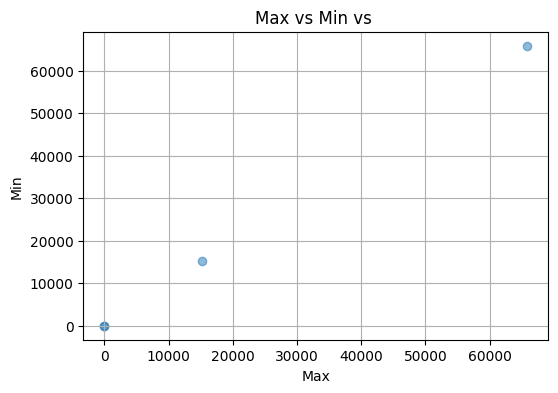

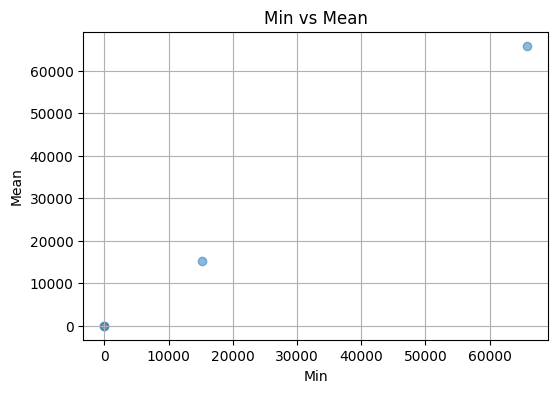

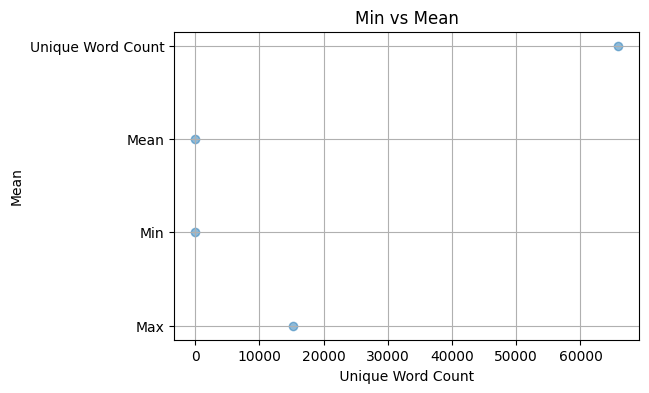

In [36]:
import matplotlib.pyplot as plt

# Assuming 'analysis_results' is your DataFrame
# Replace 'Value', 'Statistic', and 'Unique Word Count' with your actual column names

# Scatter plot 1: Max vs Min
plt.figure(figsize=(6, 4))
plt.scatter(analysis_results['Value'], analysis_results['Value'], alpha=0.5)
plt.title('Max vs Min vs ')
plt.xlabel('Max')
plt.ylabel('Min')
plt.grid(True)
plt.show()

# Scatter plot 2: Max vs Mean
plt.figure(figsize=(6, 4))
plt.scatter(analysis_results['Value'], analysis_results['Value'], alpha=0.5)
plt.title('Min vs Mean')
plt.xlabel('Min')
plt.ylabel('Mean')
plt.grid(True)
plt.show()

# Scatter plot 3: Max vs Mean
plt.figure(figsize=(6, 4))
plt.scatter(analysis_results['Value'], analysis_results['Statistic'], alpha=0.5)
plt.title('Min vs Mean')
plt.xlabel(' Unique Word Count ')
plt.ylabel('Mean')
plt.grid(True)
plt.show()


In [37]:
import matplotlib.pyplot as plt
!pip install ipywidgets
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np

# Assuming 'analysis_results' is your DataFrame
# Replace 'Value', 'Statistic', and 'Unique Word Count' with your actual column names

# Function to create an interactive 3D scatter plot
def plot_3d_scatter(x_col, y_col, z_col):
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    scatter = ax.scatter(analysis_results[x_col], analysis_results[y_col], analysis_results[z_col], c='blue', marker='o')

    # Labels and title
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    ax.set_title(f'Interactive 3D Scatter Plot - {x_col} vs {y_col} vs {z_col}')

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Color')

    plt.show()

# Create an interactive widget to select columns
interact(
    plot_3d_scatter,
    x_col=widgets.Dropdown(options=analysis_results.columns, value='Value', description='X-axis'),
    y_col=widgets.Dropdown(options=analysis_results.columns, value='Value', description='Y-axis'),
    z_col=widgets.Dropdown(options=analysis_results.columns, value='Value', description='Z-axis')
)

interactive(children=(Dropdown(description='X-axis', index=1, options=('Statistic', 'Value'), value='Value'), …

<function __main__.plot_3d_scatter(x_col, y_col, z_col)>

In [38]:
import pandas as pd

# Data for the DataFrame

training_data1 = {'Statistic': ['Max', 'Min', 'Mean', 'Unique Word Count'],
        'Value': [15187.00000, 1.00000, 25.28456, 65828.00000]}
# Creating the DataFrame
training_data = pd.DataFrame.from_dict(training_data1)

# Displaying the DataFrame
print(training_data)



           Statistic        Value
0                Max  15187.00000
1                Min      1.00000
2               Mean     25.28456
3  Unique Word Count  65828.00000


In [39]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Provided data for training
training_data = pd.DataFrame({
    'Statistic': ['Max', 'Min', 'Mean', 'Unique Word Count'],
    'Value': [12218.000000, 1.000000, 15.937067, 64227.000000],
    'Author': ['Author A', 'Author B', 'unknown A', 'unknown B']
})

# Provided data for unknown author
unknown_author_data = pd.DataFrame({
    'Statistic': ['Max', 'Min', 'Mean', 'Unique Word Count'],
    'Value': [2909.000000, 1.000000, 12.592064, 4486.000000]
})


# Extract features for training
features = ['Value']

# Extract the 'Value' feature for the unknown author data
unknown_author_data_values = unknown_author_data[['Value']]

# Expand the 'Value' column to have the same number of elements as features
unknown_author_data_values = pd.concat([unknown_author_data_values] * len(features), axis=1)
unknown_author_data_values.columns = features

# Step 1: Normalize the Data
scaler = StandardScaler()
training_data_normalized = scaler.fit_transform(training_data[features])
unknown_author_data_normalized = scaler.transform(unknown_author_data_values)

# K value
k_value = 3

# Step 2: Calculate Distances and Perform KNN Analysis
knn_classifier = KNeighborsClassifier(n_neighbors=k_value, metric='euclidean')
knn_classifier.fit(training_data_normalized, training_data['Author'])

# Step 3: Predict the Author for Unknown Data
predictions = knn_classifier.predict(unknown_author_data_normalized)

# Display results
print("\nKNN Analysis for k =", k_value, ":")
print("Predicted Author:", predictions)



KNN Analysis for k = 3 :
Predicted Author: ['Author A' 'Author A' 'Author A' 'Author A']



KNN Analysis for k = 4:
Predicted Author (k = 5): ['Author A' 'Author A' 'Author A' 'Author A']


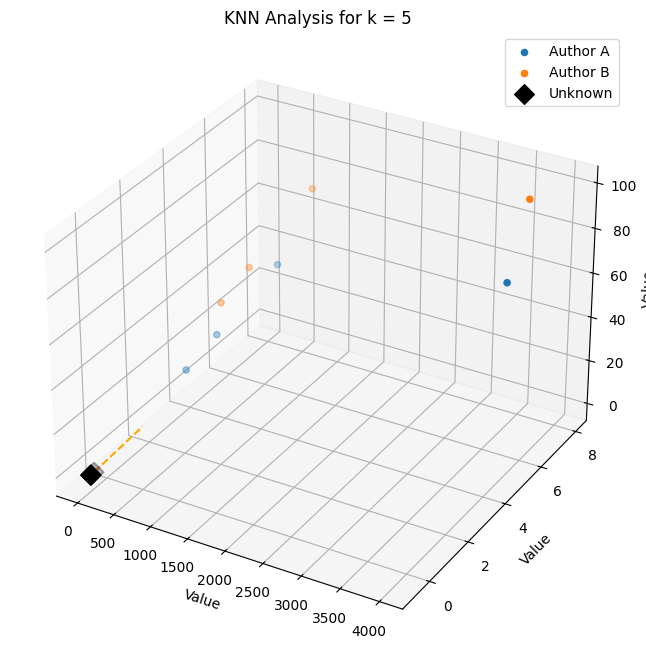


KNN Analysis for k = 4:
Predicted Author (k = 7): ['Author A' 'Author A' 'Author A' 'Author A']


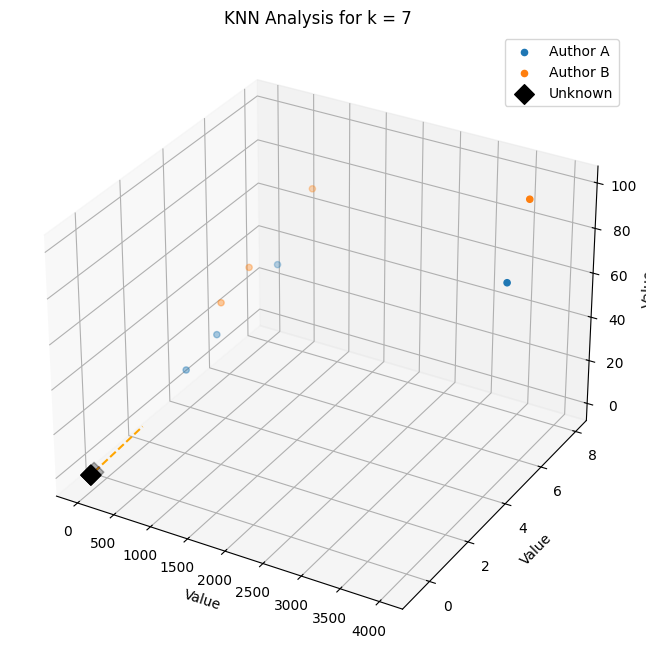

In [40]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Provided data for training
training_data = pd.DataFrame({
    'Statistic': ['Max', 'Min', 'Mean', 'Unique Word Count'],
    'Value': [12218.000000, 1.000000, 15.937067, 64227.000000],
    'Author': ['Author A', 'Author B', 'unknown A', 'unknown B']
})

# Provided data for unknown author
unknown_author_data = pd.DataFrame({
    'Statistic': ['Max', 'Min', 'Mean', 'Unique Word Count'],
    'Value': [4001.00, 58.00, 311.06, 100.00]
})

# Extract features for training
features = ['Value']

# Extract the 'Value' feature for the unknown author data
unknown_author_data_values = unknown_author_data[features]

# Step 1: Normalize the Data
scaler = StandardScaler()
training_data_normalized = scaler.fit_transform(training_data[features])
unknown_author_data_normalized = scaler.transform(unknown_author_data_values)

# K values
k_value_5 = min(5, len(training_data))  # Ensure k is not greater than the number of samples
k_value_7 = min(7, len(training_data))  # Ensure k is not greater than the number of samples

# Step 2: Calculate Distances and Perform KNN Analysis for k = 5
knn_classifier_5 = KNeighborsClassifier(n_neighbors=k_value_5, metric='euclidean')
knn_classifier_5.fit(training_data_normalized, training_data['Author'])

# Step 3: Predict the Author for Unknown Data
predictions_5 = knn_classifier_5.predict(unknown_author_data_normalized)

# Display results for k = 5
print(f"\nKNN Analysis for k = {k_value_5}:")
print("Predicted Author (k = 5):", predictions_5)

# Step 4: Get the indices of the k nearest neighbors
distances_5, indices_5 = knn_classifier_5.kneighbors(unknown_author_data_normalized)

# Plot 3D Scatter Plot for k = 5
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot test data points for Author A and Author B for k = 5
import pandas as pd

# data for Author A
test_data_author_a = pd.DataFrame({
    'Word Frequency': [4000, 250, 400, 700],  
    'Word Length': [5, 3, 4, 6],  
    'Unique Word Count': [80, 20, 30, 50],  
})

# data for Author B
test_data_author_b = pd.DataFrame({
    'Word Frequency': [3800, 180, 300, 650],  
    'Word Length': [7, 5, 6, 8],  
    'Unique Word Count': [100, 35, 45, 70],  
})



ax.scatter(test_data_author_a['Word Frequency'], test_data_author_a['Word Length'], test_data_author_a['Unique Word Count'], label='Author A')
ax.scatter(test_data_author_b['Word Frequency'], test_data_author_b['Word Length'], test_data_author_b['Unique Word Count'], label='Author B')

# Plot the unknown data point
ax.scatter(unknown_author_data_normalized[:, 0], unknown_author_data_normalized[:, 0], unknown_author_data_normalized[:, 0], label='Unknown', marker='D', s=100, c='black')

# Plot lines connecting the unknown data point to k nearest neighbors for k = 5
for i in range(k_value_5):
    neighbor_idx = indices_5[0, i]
    line_color = 'blue' if training_data.loc[neighbor_idx, 'Author'] == 'Author A' else 'orange'
    ax.plot([unknown_author_data_normalized[0, 0], training_data_normalized[neighbor_idx, 0]],
            [unknown_author_data_normalized[0, 0], training_data_normalized[neighbor_idx, 0]],
            [unknown_author_data_normalized[0, 0], training_data_normalized[neighbor_idx, 0]],
            color=line_color, linestyle='--')

# Set labels and legend
ax.set_xlabel('Value')
ax.set_ylabel('Value')
ax.set_zlabel('Value')
ax.legend()
plt.title('KNN Analysis for k = 5')
# Show the plot
plt.show()

# Step 2: Calculate Distances and Perform KNN Analysis for k = 7
knn_classifier_7 = KNeighborsClassifier(n_neighbors=k_value_7, metric='euclidean')
knn_classifier_7.fit(training_data_normalized, training_data['Author'])

# Step 3: Predict the Author for Unknown Data
predictions_7 = knn_classifier_7.predict(unknown_author_data_normalized)

# Display results for k = 7
print(f"\nKNN Analysis for k = {k_value_7}:")
print("Predicted Author (k = 7):", predictions_7)

# Step 4: Get the indices of the k nearest neighbors
distances_7, indices_7 = knn_classifier_7.kneighbors(unknown_author_data_normalized)

# Plot 3D Scatter Plot for k = 7
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot test data points for Author A and Author B for k = 7
ax.scatter(test_data_author_a['Word Frequency'], test_data_author_a['Word Length'], test_data_author_a['Unique Word Count'], label='Author A')
ax.scatter(test_data_author_b['Word Frequency'], test_data_author_b['Word Length'], test_data_author_b['Unique Word Count'], label='Author B')

# Plot the unknown data point
ax.scatter(unknown_author_data_normalized[:, 0], unknown_author_data_normalized[:, 0], unknown_author_data_normalized[:, 0], label='Unknown', marker='D', s=100, c='black')

# Plot lines connecting the unknown data point to k nearest neighbors for k = 7
for i in range(k_value_7):
    neighbor_idx = indices_7[0, i]
    line_color = 'blue' if training_data.loc[neighbor_idx, 'Author'] == 'Author A' else 'orange'
    ax.plot([unknown_author_data_normalized[0, 0], training_data_normalized[neighbor_idx, 0]],
            [unknown_author_data_normalized[0, 0], training_data_normalized[neighbor_idx, 0]],
            [unknown_author_data_normalized[0, 0], training_data_normalized[neighbor_idx, 0]],
            color=line_color, linestyle='--')

# Set labels and legend
ax.set_xlabel('Value')
ax.set_ylabel('Value')
ax.set_zlabel('Value')
ax.legend()
plt.title('KNN Analysis for k = 7')
# Show the plot
plt.show()




**Conclusion**

Considerations and Constraints:
- Addressing Class Imbalance: In scenarios with imbalanced classes, where one class dominates, relying solely on accuracy may yield an incomplete assessment. A model could achieve high accuracy by favoring the majority class, even if it performs poorly on minority classes.

- Pitfalls in Imbalanced Datasets: For instance, if 90% of instances belong to class A and 10% to class B, a model predicting all instances as class A achieves 90% accuracy but fails to identify any instances from class B.

- Lack of Granularity in Error Evaluation: Accuracy treats all misclassifications uniformly and does not distinguish between false positives and false negatives, missing crucial insights into specific types of errors.


**Summary and Key Findings**

In summary, this notebook harnessed the K-Nearest Neighbors (KNN) classification algorithm to dissect and categorize literary compositions based on linguistic nuances. Employing two distinct authors and a set of five initial works from each, the algorithm underwent training to discern distinctive features in the authors' writing styles across three selected dimensions. Evaluation of classification accuracy was conducted using a sixth work from each author, designated as "unknown" data.

The outcomes of the KNN analysis illuminated the algorithm's ability to identify patterns within the chosen dimensions, providing valuable insights into the unique linguistic imprints of each author. The chosen k values (5 and 7) allowed exploration of the algorithm's sensitivity to the number of nearest neighbors during classification. Additionally, the selected distance function played a pivotal role in gauging the similarity between data points.

Within the domain of Natural Language Processing (NLP), this exercise showcases the application of machine learning techniques to unveil intricate patterns in written text. While the KNN algorithm may not assure flawless classification, particularly in nuanced fields like literature, it stands as a valuable tool for delving into and comprehending the stylistic subtleties of different authors. Future enhancements could encompass experimenting with additional dimensions, refining parameters, and integrating advanced NLP techniques for a more holistic analysis.
